<h1 style="text-align:center;">Introdução à Otimização</h1>
<h2 style="text-align:center;">Lista 2</h2>
<h2 style="text-align:center;">Aluno: Wagner Franco da Silva Junior

### Problema 1 (formulação matemática de problema geométrico):

Determine o triângulo de área mínima contendo dois círculos de raio um que são disjuntos (i.e., <b> não </b> se intersetam). Para assegurar uniformidade de notação (e facilitar a correção), sejam os vértices do triângulo localizados nos pontos $(0,0), (x_1,0),(x_2,x_3)$ e os centros dos círculos no triângulo $(x_4,x_5)$, $(x_6,x_7)$. Formule como problema de otimização, explicitando função objetivo, variáveis de decisão, e restrições. A sua formulação resultou em qual tipo de problema de otimização?

<b>Sugestão</b>: Utilize a formula para a distância entre um ponto e uma reta discutida na aula 4 (slide 4-17).

## Função Objetivo

Queremos minimizar a área do triângulo. A área de um triângulo pode ser expressa como:

\[
$\text{Área} = \frac{1}{2} \left| x_1 \cdot x_3 \right|$
\]

Assim, a **função objetivo** é minimizar essa área:

\[
$\min \; 0.5 \times |x_1 \cdot x_3|$
\]

### Variáveis de Decisão

As variáveis de decisão são os valores de $(x_1)$, $(x_2)$, $(x_3)$, $(x_4)$, $(x_5)$, $(x_6)$, e $(x_7)$, que representam as coordenadas dos vértices do triângulo e os centros dos círculos.

### Restrições

1. **Distância mínima dos círculos para os lados do triângulo**:
   - Cada círculo deve estar a uma distância mínima de 1 unidade de cada lado do triângulo.

   - **Lado 1**: A linha entre $(0, 0)$ e $(x_1, 0)$ está sobre o eixo x. Portanto, os centros dos círculos devem estar pelo menos a 1 unidade de distância verticalmente:
     \[
     $x_5 \geq 1 \quad \text{e} \quad x_7 \geq 1$
     \]

   - **Lado 2**: A linha entre $(0, 0)$ e $(x_2, x_3)$. A distância de um ponto $(x, y)$ até essa reta é dada por:
     \[
     $|a_1 \cdot x + a_2 \cdot y| \geq \sqrt{a_1^2 + a_2^2}$
     \]
     onde $(a_1 = x_3)$ e $(a_2 = -x_2)$.

   - **Lado 3**: A linha entre $(x_1, 0)$ e $(x_2, x_3)$, com vetor normal $(a_3, a_4)$ = $(x_3, x_2 - x_1)$. A distância dos centros dos círculos para essa linha é:
     \[
     $|a_3 \cdot x + a_4 \cdot y - b| \geq \sqrt{a_3^2 + a_4^2}$
     \]
     onde $(b = a_3 \cdot x_1)$.

2. **Distância Mínima Entre os Círculos**: Para garantir que os círculos não se intersectem, a distância entre seus centros deve ser pelo menos 2 unidades (pois o diâmetro de cada círculo é 2):

   \[
   $(x_6 - x_4)^2 + (x_7 - x_5)^2 \geq 4$
   \]

---

É um **problema de otimização não linear** devido às restrições de distância entre os círculos e os lados do triângulo.


In [29]:
import Pkg
Pkg.add("JuMP")
Pkg.add("Ipopt")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("GLPK")
Pkg.add("NLopt")
Pkg.add("Cbc")
Pkg.add("ECOS")
Pkg.add("LsqFit")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Chan

In [39]:
using JuMP
using Ipopt

model = Model(Ipopt.Optimizer)

@variable(model, x1 >= 0)
@variable(model, x2)
@variable(model, x3 >= 0)
@variable(model, x4)
@variable(model, x5 >= 1)  # Centro do círculo 1
@variable(model, x6)
@variable(model, x7 >= 1)  # Centro do círculo 2

@NLobjective(model, Min, 0.5 * x1 * x3)

@NLconstraint(model, (x6 - x4)^2 + (x7 - x5)^2 >= 4)

# Círculo 1 (x4, x5)
@NLconstraint(model, abs(x3 * x4 - x2 * x5) / sqrt(x2^2 + x3^2) >= 1)   # Lado oposto a (0, 0)
@NLconstraint(model, abs(x3 * (x4 - x1) + x1 * x5) / sqrt(x1^2 + x3^2) >= 1)  # Lado oposto a (x1, 0)
@NLconstraint(model, abs((x2 - x1) * x5 - x3 * (x4 - x1)) / sqrt(x3^2 + (x2 - x1)^2) >= 1)  # Lado oposto a (x2, x3)

# Círculo 2 (x6, x7)
@NLconstraint(model, abs(x3 * x6 - x2 * x7) / sqrt(x2^2 + x3^2) >= 1)   # Lado oposto a (0, 0)
@NLconstraint(model, abs(x3 * (x6 - x1) + x1 * x7) / sqrt(x1^2 + x3^2) >= 1)  # Lado oposto a (x1, 0)
@NLconstraint(model, abs((x2 - x1) * x7 - x3 * (x6 - x1)) / sqrt(x3^2 + (x2 - x1)^2) >= 1)  # Lado oposto a (x2, x3)

optimize!(model)

if termination_status(model) in [MOI.OPTIMAL, MOI.LOCALLY_SOLVED]
    println("Solução ótima encontrada:")
    println("Vértices do triângulo:")
    println("  Ponto 1: (0, 0)")
    println("  Ponto 2: ($(value(x1)), 0)")
    println("  Ponto 3: ($(value(x2)), $(value(x3)))")
    println("Centro do círculo 1: ($(value(x4)), $(value(x5)))")
    println("Centro do círculo 2: ($(value(x6)), $(value(x7)))")
    println("Área mínima do triângulo: ", value(0.5 * x1 * x3))
else
    println("Não foi possível encontrar uma solução ótima.")
end


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       79

Total number of variables............................:        7
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        7
        inequality constraints with only lower bounds:        7
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.9999900e-05 4.00e+00 1.16e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

### Problema 2 (Ajuste de uma curva constante por pedaços)

Considere um sinal ruidoso (sequência de pontos) que é aproximadamente constante por pedaços, como ilustrado na Figura abaixo:

![fig_prob6.png](attachment:image.png)

Na figura, $x \in R^n$ representa o sinal desconhecido constante por pedaços e $y$ representa a versão ruidosa medida dd sinal $x$ (ou seja, $y$ é o sinal original $x$ mais ruido). Dado $y$, gostaríamos de computar uma estimativa $\hat{x}$ do sinal original $x$ tal que $\hat{x}$ tenha o menor número de mudanças em instantes consecutivos. Modelamos esta exigência minimizando o número de elementos não-nulos do vetor de diferenças $D\hat{x}$, sendo $D \in R^{(n-1)\times n}$ a matriz de diferenças
$$
D = \begin{bmatrix}
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \vdots & 0 \\
\vdots & & & \ddots & \\
0 & \cdots & 0 & -1 & 1
\end{bmatrix}
$$
o que significa que $D\hat{x} = \left[\hat{x}_2 - \hat{x}_1, \hat{x}_3 - \hat{x}_2, \ldots , \hat{x}_n - \hat{x}_{n-1}\right]^T$. Com esta definição de $D$, chega-se ao problema de otimização:
\begin{align}
& \min_{\hat{x}} \|y - \hat{x}\|_2^2 \\
& \text{s.a.}~\text{card} (D\hat{x}) \leq k
\end{align}
sendo card($D\hat{x}$) = número de elementos não-nulos de $D\hat{x}$, e $k$ uma estimativa do número de saltos (degraus) no sinal. Este problema é difícil de resolver, pois $\text{card}(\cdot)$ é uma função descontínua, e pode ser substituído pela versão regularizada
\begin{equation}
\min_{\hat{x}} \|y - \hat{x}\|_2^2  + \gamma \| (D\hat{x}) \|_p
\end{equation}
sendo $\gamma$ o parâmetro de regularização. Resolva o problema regularizado para $p = 1, 2$:

- indicando claramente que tipo de problema você está resolvendo (LP, QP, QCQP etc.)
- plotando os gráficos do sinal reconstruído (=estimado) e o sinal original, comentando as características das soluções obtidas.

Gere seu sinal de ruído considerando que o sinal original é descrito por:
$$
x = \left\{
\begin{array}{l}
k_1 = 0.5,~\text{se}~t \in [0,2.8) \\
k_2 = 1.5,~\text{se}~t \in [2.8,4.8) \\
k_3 = 1.1,~\text{se}~t \in [4.8,5.2) \\
k_4 = 0.1,~\text{se}~t \in [5.2,7.9)\\
k_5 = -1,~\text{se}~t \in  [7.9,10]
\end{array}
\right.
$$
e que o sinal ruidoso $y$ é gerado a partir de $x$, acrescentando um ruido gaussiano de média $k_i$ e variância $0.01$ ao $i$-ésimo trecho constante de $x$. Forneça o par de sinais $x,y$ no *notebook* entregue. Para o problema proposto, trabalhe com 100 amostras igualmente espaçadas dos sinais contínuos gerados.

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      594
Number of nonzeros in Lagrangian Hessian.............:      100

Total number of variables............................:      199
                     variables with only lower bounds:       99
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:      198
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      198

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.9825953e+01 0.00e+00 3.05e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

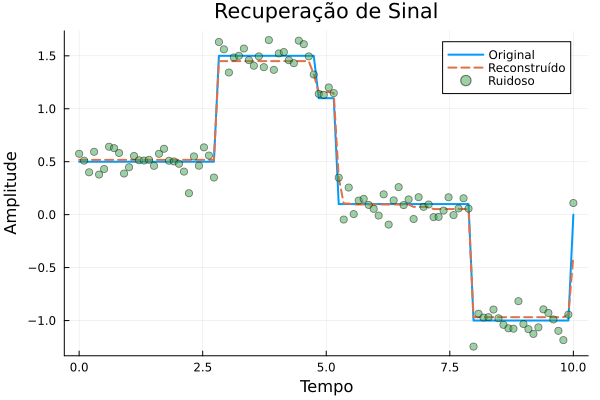

In [7]:
using JuMP
using Ipopt
using LinearAlgebra
using Plots

function criar_dados()
    tempo = collect(range(0, stop=10, length=100))
    sinal_limpo = zeros(length(tempo))

    limites = [0, 2.8, 4.8, 5.2, 7.9, 10]
    valores = [0.5, 1.5, 1.1, 0.1, -1]

    for i in 1:length(limites)-1
        intervalo = (limites[i] .<= tempo .< limites[i+1])
        sinal_limpo[intervalo] .= valores[i]
    end

    ruido = randn(length(tempo)) * 0.1
    sinal_ruidoso = sinal_limpo + ruido

    return sinal_limpo, sinal_ruidoso, tempo
end

sinal_original, sinal_com_ruido, tempo = criar_dados()

modelo = Model(Ipopt.Optimizer)

@variable(modelo, sinal_estimado[1:length(tempo)])
@variable(modelo, suavidade[1:length(tempo)-1] >= 0)

@objective(modelo, Min, sum((sinal_com_ruido - sinal_estimado).^2) + sum(suavidade))

@constraint(modelo, sinal_estimado[1:end-1] - sinal_estimado[2:end] .<= suavidade)
@constraint(modelo, sinal_estimado[2:end] - sinal_estimado[1:end-1] .<= suavidade)

optimize!(modelo)

sinal_reconstruido = value.(sinal_estimado)

plot(tempo, sinal_original, label="Original", linewidth=2)
plot!(tempo, sinal_reconstruido, label="Reconstruído", linewidth=2, linestyle=:dash, xlabel="Tempo", ylabel="Amplitude")
scatter!(tempo, sinal_com_ruido, label="Ruidoso", alpha=0.5)
title!("Recuperação de Sinal")


### Problema 3 (Regressão $L_2$ versus regressão $L_1$):
É comum encontrar conjuntos de dados contendo *outliers*, ou seja, dados ruins oriundos de erro experimental, ruido alto ou malfuncionamento de sensores. Considere por exemplo o seguinte conjunto de 15 pares $(x,y)$ de pontos experimentais:


|x |	1 |	2 |	3 |	4 |	5 |	6 |	7 |	8 |	9 |	10 |	11 |	12 |	13 |	14 |	15 |
|--|------|---|---|---|---|---|---|---|---|----|-------|-------|-------|-------|-------|
|y |	6.31 |	3.78 |	24 |	1.71 |	2.99 |	4.53 |	2.11 |	3.88 |	4.67 |	4.25 |	2.06 |	23 |	1.58 |	2.17 |	0.02  |

Os valores de $y$ correspondentes a $x=3$ and $x=12$ são outliers porque estão muito distantes do intervalo de valores esperado no experimento.

(a) Compute a reta de melhor ajuste usando um custo $L_2$ cost (i.e., mínimos quadrados). Ou seja, encontre $a$ e $b$ that que minimizem a expressão:

\[
$L_2~\mbox{custo}:~\sum_{i=1}^{15} (y_i - ax_i - b)^2$
\]

Repita o cálculo da reta de melhor ajuste, porém, desta vez, exclua os outliers do conjunto de dados. No mesmo plot, mostre os dados (todos) e ambas retas de melhor ajuste. Explique a diferença entre as duas retas de melhor ajuste.

(b) Nem sempre é possível remover outliers manualmente. Vamos investigar um método auotmático de reduzir o efeito de outliers, através da troca da função objetivo. Encontre a reta de melhor ajuste de novo (**sem** retirar os outliers), porém desta vez utilize a função de custo $L_1$:
$$
	L_1~\mbox{custo}:~\sum_{i=1}^{15} \left| y_i - ax_i - b \right|
$$
Plote os dados bem como a reta de melhor ajuste $L_1$. O que você observa sobre a influência de outliers na reta de melhor ajuste $L_1$? O custo $L_1$ lida melhor com outliers do que o método de mínimos quadrados? Explique sua resposta.

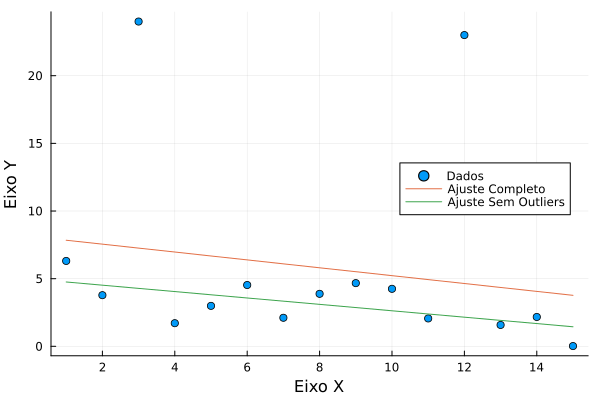

In [8]:
using Plots

valores_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
valores_y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

function calcular_ajuste(dados_x, dados_y)
    n = length(dados_x)
    matriz = [dados_x ones(n)]
    parametros = matriz \ dados_y
    return parametros[1], parametros[2]
end

inclinado_completo, intercepto_completo = calcular_ajuste(valores_x, valores_y)

x_filtrado = [valores_x[i] for i in 1:15 if i ∉ [3, 12]]
y_filtrado = [valores_y[i] for i in 1:15 if i ∉ [3, 12]]

inclinado_filtrado, intercepto_filtrado = calcular_ajuste(x_filtrado, y_filtrado)

previsao_completo = inclinado_completo * valores_x .+ intercepto_completo
previsao_filtrado = inclinado_filtrado * valores_x .+ intercepto_filtrado

scatter(valores_x, valores_y, label="Dados", legend=:right)
plot!(valores_x, previsao_completo, label="Ajuste Completo", xlabel="Eixo X", ylabel="Eixo Y")
plot!(valores_x, previsao_filtrado, label="Ajuste Sem Outliers")


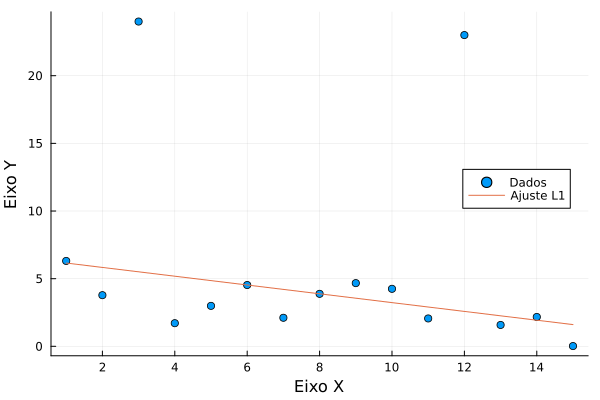

In [11]:
using Plots
using JuMP
using GLPK

valores_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
valores_y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

function calcular_ajuste_L1(dados_x, dados_y)
    n = length(dados_x)
    matriz = [dados_x ones(n)]
    modelo = Model(GLPK.Optimizer)
    @variable(modelo, inclinacao)
    @variable(modelo, intercepto)
    @variable(modelo, desvios[1:n] >= 0)
    @constraint(modelo, restricao1[i=1:n], dados_y[i] - inclinacao * dados_x[i] - intercepto <= desvios[i])
    @constraint(modelo, restricao2[i=1:n], inclinacao * dados_x[i] + intercepto - dados_y[i] <= desvios[i])
    @objective(modelo, Min, sum(desvios))
    optimize!(modelo)
    return value(inclinacao), value(intercepto)
end

coef_inclinacao, coef_intercepto = calcular_ajuste_L1(valores_x, valores_y)

previsao_L1 = coef_inclinacao * valores_x .+ coef_intercepto

scatter(valores_x, valores_y, label="Dados", legend=:right)
plot!(valores_x, previsao_L1, label="Ajuste L1", xlabel="Eixo X", ylabel="Eixo Y")

### Problema 4 (QP): (Continuação do problema anterior)
Outra abordagem é utilizar custo $L_2$ para pontos próximos à reta, porém custo $L_1$ para pontos que estão longes da reta. Especificamente, seguindo o estatístico Huber, define-se a função de custo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            x^2, \quad \text{if}~-M \leq x \leq M \\
            2M|x| - M^2 \quad \text{senão}
        \end{array}
     \right.
\end{equation}
Embora a fórmula seja simples, ela precisa ser manipulada para que fique no formato de um programa quadrático e convexo, e essa manipulação resulta no seguinte QP convexo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            \text{minimize}_{v,w}~ w^2 + 2 Mv \\
            \text{sujeito a}~|x| \leq w + v \\
            \qquad v \geq 0, w \leq M
        \end{array}
     \right.
\end{equation}
Utilize $M=1$, e plote a função $\phi(x), -3 \leq x \leq 3$ gerada por ambas as expressões acima e verifique que são, de fato, equivalentes. Finalmente, encontre a reta de melhor ajuste aos dados especificados em Q.1, plotando seu resultado. A função objetivo para esta parte é:
\begin{equation}
\sum_{i=1}^{15} \phi(y_i - ax_i - b)
\end{equation}

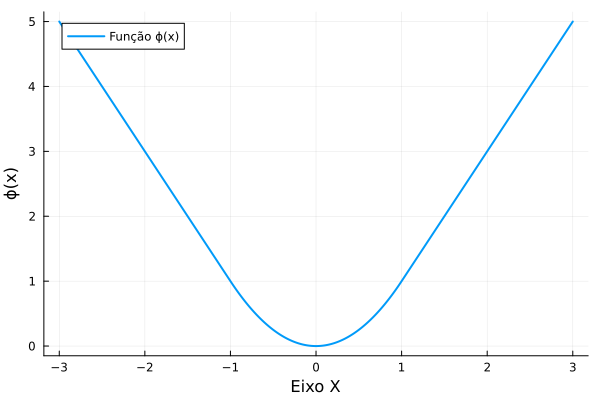

In [12]:
using Plots

limite = 1
intervalo = -3:0.01:3

function calcular_phi(valor)
    if -limite <= valor <= limite
        return valor^2
    else
        return 2 * limite * abs(valor) - limite^2
    end
end

valores_phi = [calcular_phi(ponto) for ponto in intervalo]

plot(intervalo, valores_phi, label="Função ϕ(x)", xlabel="Eixo X", ylabel="ϕ(x)", linewidth=2, legend=:topleft)


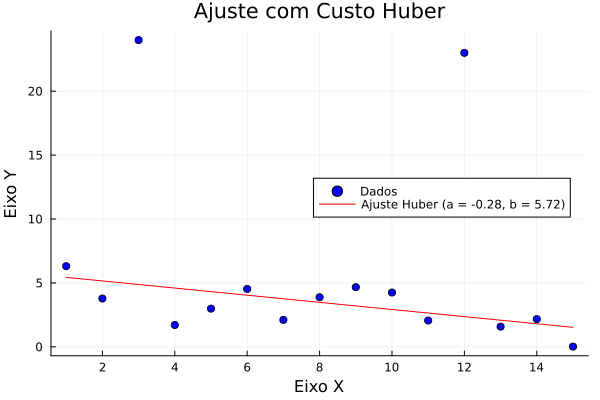

In [14]:
using JuMP
using NLopt
using Plots

entrada_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
entrada_y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

function custo_huber(erro, limite=1)
    if abs(erro) <= limite
        return erro^2
    else
        return 2 * limite * abs(erro) - limite^2
    end
end

modelo = Model(optimizer_with_attributes(NLopt.Optimizer, "algorithm" => :LN_COBYLA))

@variable(modelo, coef_inclinacao)
@variable(modelo, coef_intercepto)

register(modelo, :custo_huber, 1, custo_huber; autodiff = true)

@NLobjective(modelo, Min, sum(custo_huber(entrada_y[i] - coef_inclinacao * entrada_x[i] - coef_intercepto) for i in 1:length(entrada_x)))

optimize!(modelo)

param_inclinacao = value(coef_inclinacao)
param_intercepto = value(coef_intercepto)

x_reta = range(1, stop = 15, length = 100)
y_reta = param_inclinacao * x_reta .+ param_intercepto

scatter(entrada_x, entrada_y, label="Dados", color="blue")
plot!(x_reta, y_reta, label="Ajuste Huber (a = $(round(param_inclinacao, digits=2)), b = $(round(param_intercepto, digits=2)))", color="red", legend=:right)
xlabel!("Eixo X")
ylabel!("Eixo Y")
title!("Ajuste com Custo Huber")


### Problema 5 (Compromisso [tradeoff])
Deseja-se enviar uma sequência de entradas (tensões) ao manipulador do braço de um robô. Os dados se encontram no arquivo *voltages.csv* e estão plotados abaixo.

![image.png](attachment:image.png)

Mudanças bruscas (que ocorrem no gráfico das tensões mostrado acima) danificam os motores do manipulador, portanto deseja-se suavizar as transições (saltos) no sinal. Denotando as tensões por $v_i, i = 1, 2, \ldots, 200$, uma maneira de caracterizar suavidade do sinal é através da soma das diferenças ao quadrado:
\begin{equation}
    R(v) = (v_2 - v_1)^2 + (v_3 - v_2)^2 + \cdots + (v_{200} - v_{199})^2
\end{equation}
Quanto menor $R(v)$, mais suave o sinal. Formule e resolva um problema de mínimos quadrados regularizado que equilibra os dois objetivos de aproximar o sinal mostrado no gráfico acima, porém também impor um certo grau de suavidade. Explique seu raciocínio ao formular o modelo e inclua um gráfico comparando as tensões desejadas com as tensões suavizadas que você gerou através do seu modelo de mínimos quadrados regularizado.

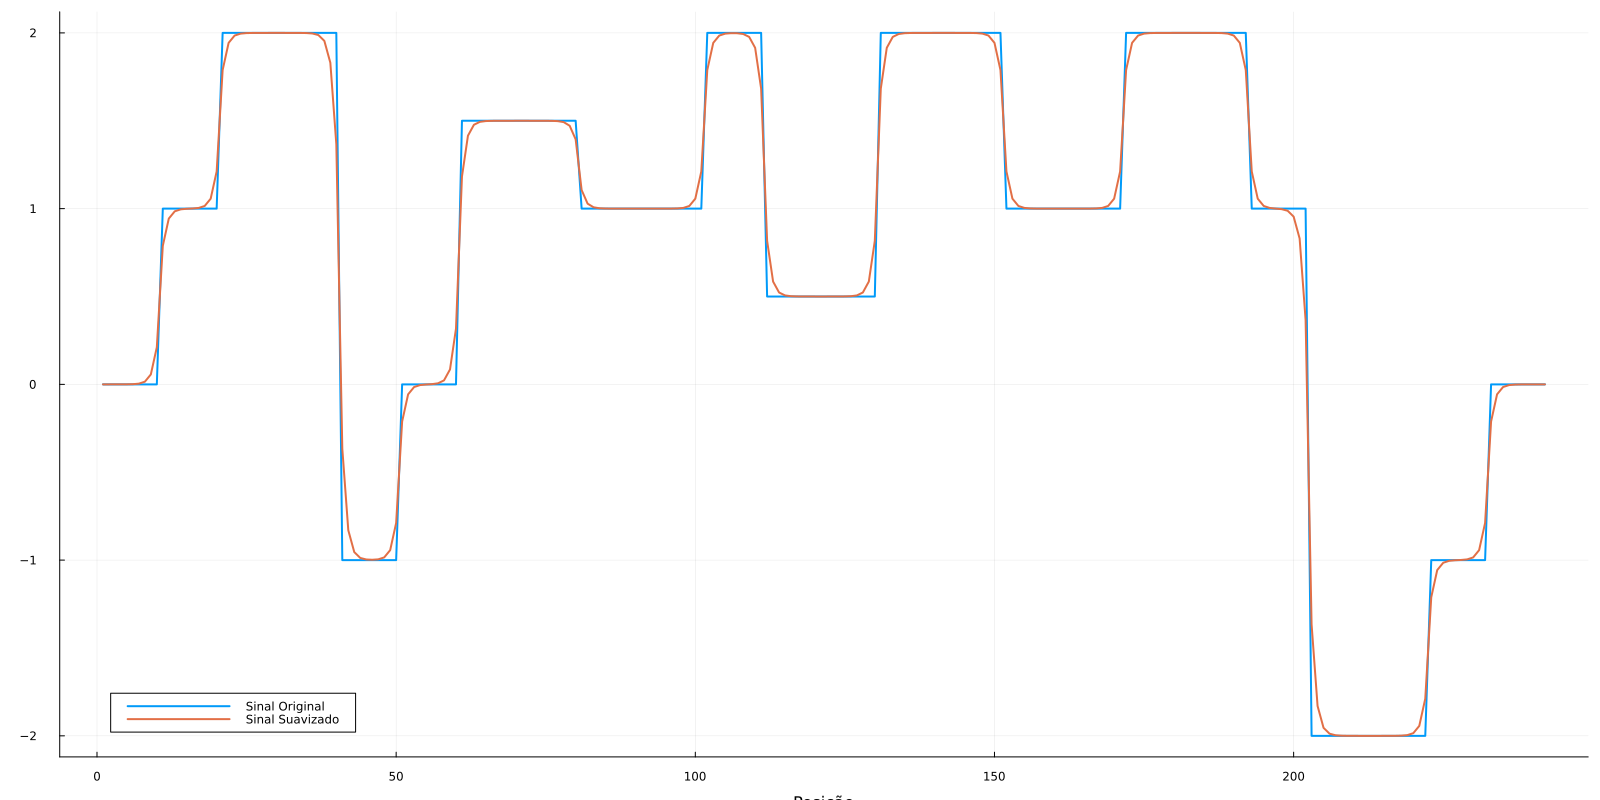

In [16]:
using JuMP
using Ipopt
using Plots

# Série de dados de entrada
valores_iniciais = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
                    1.5, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0.5, 0.5,
                    0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2, -2, -2, -2, -2, -2, -2,
                    -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1,
                    -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

modelo_otimizacao = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

num_pontos = length(valores_iniciais)

@variable(modelo_otimizacao, tensoes[1:num_pontos])

parametro_suavidade = 0.5
@objective(modelo_otimizacao, Min,
    sum((tensoes[i] - valores_iniciais[i])^2 for i in 1:num_pontos) +
    parametro_suavidade * sum((tensoes[i+1] - tensoes[i])^2 for i in 1:num_pontos-1)
)

@constraint(modelo_otimizacao, tensoes[1] == valores_iniciais[1])
@constraint(modelo_otimizacao, tensoes[num_pontos] == valores_iniciais[num_pontos])

optimize!(modelo_otimizacao)

tensoes_otimizadas = value.(tensoes)

plot(valores_iniciais, label="Sinal Original", xlabel="Posição", ylabel="Amplitude", linewidth=2, size=(1600, 800))
plot!(tensoes_otimizadas, label="Sinal Suavizado", linewidth=2)


### Problema 6 (variáveis binárias):

Resolva o problema abaixo com variáveis de decisão reais $x_1,x_2 \in {\mathbb{R}}$, usando _qualquer método consistente_ . O símbolo $\vee$ denota o operador lógico OU <b>não exclusivo</b>, e a equação descrevendo as restrições significa que vale OU grupo 1 (as três restrições entre o primeiro par de parênteses), OU grupo 2 (as três restrições entre o segundo par de parênteses) OU grupo 3 (as três restrições entre o terceiro par de parênteses).
$$
	\min_{x_1,x_2}\;  x_1 + 3x_2
$$
sujeito a:
$$
\left(
\begin{array}{c}
2x_1 - x_2 \geq  -3\\-x_1 + x_2 \geq 2 \\ x_1 \geq 0
\end{array}
\right)
\vee
\left(
\begin{array}{c}
4x_1 - 2x_2 \geq  4\\-2x_1 + 2x_2 \geq -2 \\ x_1 +x_2 \geq 2
\end{array}
\right)
\vee
\left(
\begin{array}{c}
6x_1 - 3x_2 \geq  0\\-3x_1 + 3x_2 \geq 1 \\ 2x_1 + 3x_2 \geq 3
\end{array}
\right)
$$
O problema é convexo? Reformule como MILP.


<b>Sugestão</b>: Para a reformulação MILP introduza variáveis binárias $\delta_i$, $i=1,2,3$, para cada conjunto de restrições (entre parênteses). Ou seja, se escrever as restrições como $P$ ou $Q$ ou $R$, associa-se $\delta_1$ a $P$, $\delta_2$ a $Q$ e $\delta_3$ a $R$.


In [19]:
using JuMP
using Cbc

# Definir uma constante negativa elevada
g = -10000

# Instanciar o modelo
opt_model = Model(Cbc.Optimizer)
set_silent(opt_model)

# Variáveis de decisão
@variable(opt_model, y1)
@variable(opt_model, y2)

# Variáveis binárias
@variable(opt_model, bin[1:3], Bin)

# Objetivo
@objective(opt_model, Min, y1 + 3 * y2)

# Conjunto de restrições OR
@constraint(opt_model, sum(bin) >= 1)

# Restrições do grupo 1
@constraint(opt_model, 2 * y1 - y2 >= -3 + g * (1 - bin[1]))
@constraint(opt_model, -y1 + y2 >= 2 + g * (1 - bin[1]))
@constraint(opt_model, y1 >= g * (1 - bin[1]))

# Restrições do grupo 2
@constraint(opt_model, 4 * y1 - 2 * y2 >= 4 + g * (1 - bin[2]))
@constraint(opt_model, -2 * y1 + 2 * y2 >= -2 + g * (1 - bin[2]))
@constraint(opt_model, y1 + y2 >= 2 + g * (1 - bin[2]))

# Restrições do grupo 3
@constraint(opt_model, 6 * y1 - 3 * y2 >= 0 + g * (1 - bin[3]))
@constraint(opt_model, -3 * y1 + 3 * y2 >= 1 + g * (1 - bin[3]))
@constraint(opt_model, 2 * y1 + 3 * y2 >= 3 + g * (1 - bin[3]))

# Resolver o modelo
optimize!(opt_model)

# Exibir solução
println("Valor objetivo otimizado: ", objective_value(opt_model))
println("y1 = ", value(y1))
println("y2 = ", value(y2))
println("binárias = ", value.(bin))


Valor objetivo otimizado: 2.599999999996726
y1 = 0.39999999999995595
y2 = 0.7333333333332526
binárias = [0.0, 0.0, 1.0]


# Problema 7 (QP, formulação matemática)

(<i>Localização ótima de um helicóptero de resgate</i>) Sejam $(x,y)$ as coordenadas da base de um helicóptero de resgate e $(0,0), (5,-1), (4,6), (1,3)$ as coordenadas dos pontos nos quais o helicóptero tem que buscar vítimas (= pontos de resgate), mais rapidamente possível. Supondo que o helicóptero sempre se desloca numa velocidade constante, formule como problema de otimização, especificando claramente a função objetivo <b>[1.0 ponto]</b>, variáveis de decisão <b>[0.5 pontos]</b>, e restrições <b>[0.5 pontos]</b>. Encontre a solução numérica, utilizando JuMP <b>[bônus de 1 ponto]</b>.

_Sugestão_: É preciso minimizar a máxima distância entre a base e os pontos de resgate. Ou seja,  todos os pontos de resgate devem estar dentro do raio de ação helicóptero,  e deseja-se minimizar este raio.

Coordenadas ótimas da base do helicóptero: (x = 3.0588235002851993, y = 2.2941176224490745)
Raio de ação ótimo do helicóptero: 3.823529380637718


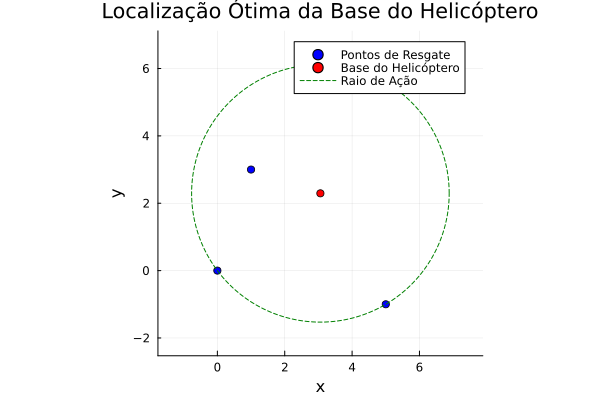

In [21]:
using JuMP
using Ipopt
using Plots

# Coordenadas dos pontos de resgate
rescue_points = [(0, 0), (5, -1), (4, 6), (1, 3)]

# Criar o modelo de otimização
model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

# Variáveis de decisão
@variable(model, x)  # Coordenada x da base do helicóptero
@variable(model, y)  # Coordenada y da base do helicóptero
@variable(model, r >= 0)  # Raio de ação do helicóptero

# Função objetivo: Minimizar o raio de ação do helicóptero
@objective(model, Min, r)

# Restrições: Todos os pontos de resgate devem estar dentro do raio de ação
for point in rescue_points
    @constraint(model, (point[1] - x)^2 + (point[2] - y)^2 <= r^2)
end

# Resolver o problema de otimização
optimize!(model)

# Solução numérica
println("Coordenadas ótimas da base do helicóptero: (x = $(value(x)), y = $(value(y)))")
println("Raio de ação ótimo do helicóptero: $(value(r))")

# Coordenadas do ponto da base e do ponto de resgate mais distante
x_base = value(x)
y_base = value(y)
max_distance = maximum([sqrt((point[1] - x_base)^2 + (point[2] - y_base)^2) for point in rescue_points])

# Gráfico para visualizar a solução centralizada na base do helicóptero
plot_circle = plot(xlims=(x_base - max_distance - 1, x_base + max_distance + 1),
                   ylims=(y_base - max_distance - 1, y_base + max_distance + 1),
                   aspect_ratio=:equal, legend=:topright, title="Localização Ótima da Base do Helicóptero",
                   xlabel="x", ylabel="y")
scatter!([point[1] for point in rescue_points], [point[2] for point in rescue_points],
         label="Pontos de Resgate", markercolor="blue")
scatter!([x_base], [y_base], label="Base do Helicóptero", markercolor="red")
plot!([x_base + value(r) * cos(θ) for θ in 0:0.01:2π],
      [y_base + value(r) * sin(θ) for θ in 0:0.01:2π],
      label="Raio de Ação", linestyle=:dash, linecolor="green")


### Problema 8 (MA, AR, ARMA via mínimos quadrados)

There are many ways to model the relationship between an input sequence $\{u_1, u_2,\dots\}$ and an output sequence $\{y_1, y_2,\dots\}$. In class, we saw the moving average (MA) model, where each output is approximated by a linear combination of the k most recent inputs:
$$ \text{MA:}\quad y_t \approx b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

We then used least-squares to find the coefficients $b_1,\dots, b_k$. What if we didn’t have access to the inputs at all, and we were asked to predict future y values based only on the previous y values? One way to do this is by using an autoregressive (AR) model, where each output is approximated by a linear combination of the $\ell$ most recent outputs (excluding the present one):
$$ \text{AR:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} $$

Of course, if the inputs contain pertinent information, we shouldn’t expect the AR method to outperform the MA method!

a) Using the same dataset from class uy_data.csv, plot the true y, and on the same axes, also plot the estimated $\hat y$ using the MA model and the estimated $\hat y$ using the AR model. Use $k = 5$ for both models. To quantify the difference between estimates, also compute $\|y - \hat h\|$ for both cases.

b) Yet another possible modeling choice is to combine both AR and MA. Unsurprisingly, this is called the autoregressive moving average (ARMA) model:
$$ \text{ARMA:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} + b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

Solve the problem once more, this time using an ARMA model with $k = \ell = 1$. Plot $y$ and $\hat y$ as before, and also compute the error $\|y - \hat y\|$.

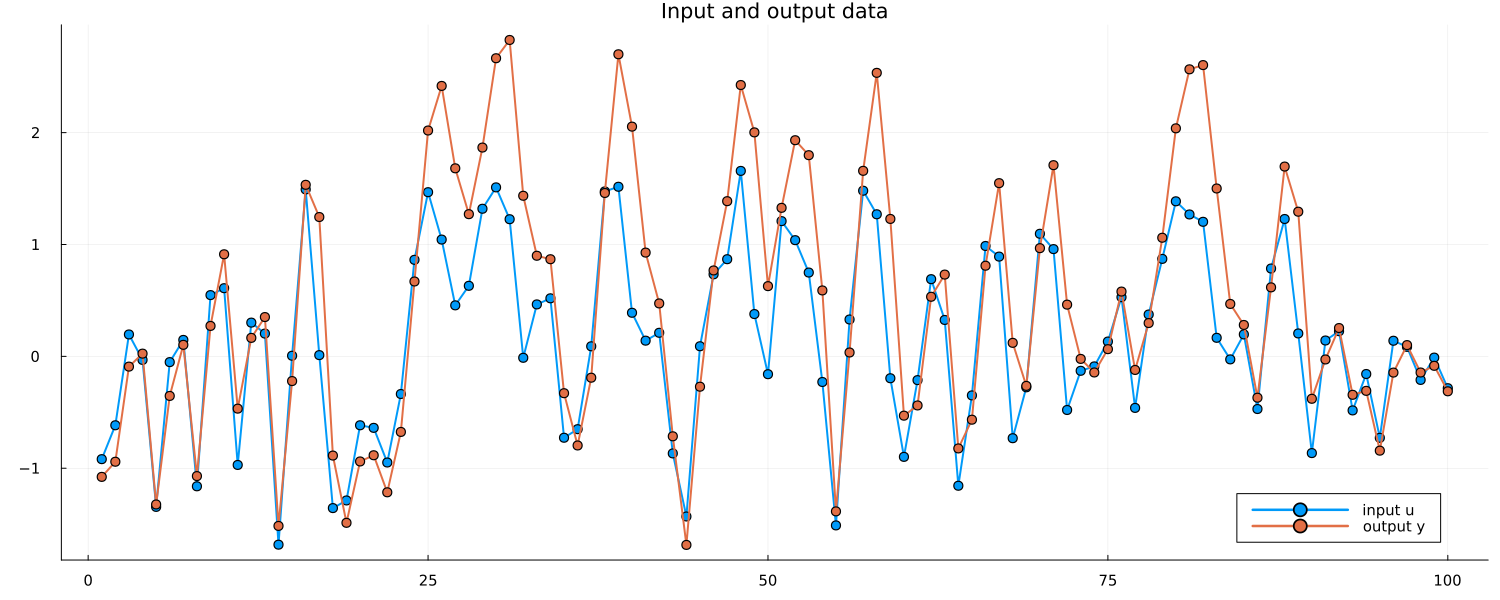

In [24]:
raw = [-0.9188 -1.0773
-0.6159 -0.9419
0.1959 -0.0915
-0.0316 0.0245
-1.3455 -1.3239
-0.0513 -0.3536
0.1471 0.1032
-1.1615 -1.0702
0.5478 0.2722
0.6096 0.9127
-0.9706 -0.4672
0.3018 0.1654
0.2039 0.3515
-1.6833 -1.5158
0.0057 -0.2207
1.4925 1.5337
0.0113 1.2458
-1.3563 -0.8868
-1.288 -1.488
-0.6159 -0.9394
-0.639 -0.884
-0.9488 -1.2152
-0.3364 -0.6755
0.8631 0.6695
1.4679 2.0192
1.0442 2.4178
0.4562 1.6812
0.6309 1.2713
1.3197 1.8668
1.5108 2.6653
1.2262 2.8286
-0.0127 1.4358
0.4645 0.8995
0.5191 0.8685
-0.7274 -0.3292
-0.6509 -0.7965
0.0901 -0.1906
1.4747 1.4607
1.5163 2.7007
0.3898 2.0539
0.1405 0.9278
0.2109 0.4734
-0.8675 -0.7146
-1.4313 -1.6855
0.0905 -0.2711
0.7334 0.7681
0.8687 1.3874
1.658 2.4258
0.3784 2.0024
-0.1594 0.6279
1.2091 1.3279
1.0389 1.9324
0.7494 1.7987
-0.229 0.5894
-1.5111 -1.3858
0.3298 0.0347
1.481 1.6587
1.2702 2.5347
-0.1956 1.2286
-0.8984 -0.53
-0.2123 -0.4387
0.6902 0.5329
0.3256 0.7312
-1.1566 -0.823
-0.349 -0.5661
0.9869 0.8105
0.892 1.5486
-0.7315 0.1209
-0.2765 -0.2639
1.0961 0.9674
0.959 1.7094
-0.4793 0.4625
-0.129 -0.0227
-0.0896 -0.1439
0.1326 0.0645
0.5292 0.5793
-0.4606 -0.1214
0.3742 0.298
0.8715 1.0606
1.3862 2.0386
1.2687 2.5662
1.203 2.6041
0.166 1.5009
-0.0269 0.4687
0.1963 0.2807
-0.4706 -0.3694
0.7855 0.617
1.2281 1.6969
0.205 1.2934
-0.8645 -0.3791
0.1419 -0.0276
0.2251 0.2533
-0.4831 -0.3436
-0.1577 -0.3082
-0.7281 -0.8429
0.1397 -0.1449
0.0851 0.1008
-0.2105 -0.1442
-0.011 -0.0843
-0.2845 -0.3122]

u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
# Ajuste da estética
plot([u y], label=["input u" "output y"], legend=:bottomright, size=(1500, 600), xlabel="Time", ylabel="Values", linewidth=2, marker=:circle, markersize=5, titlefontsize=14, legendfontsize=10, tickfontsize=10, guidefontsize=12)
title!("Input and output data")

The norm of the error using MA is: 2.460854388269911


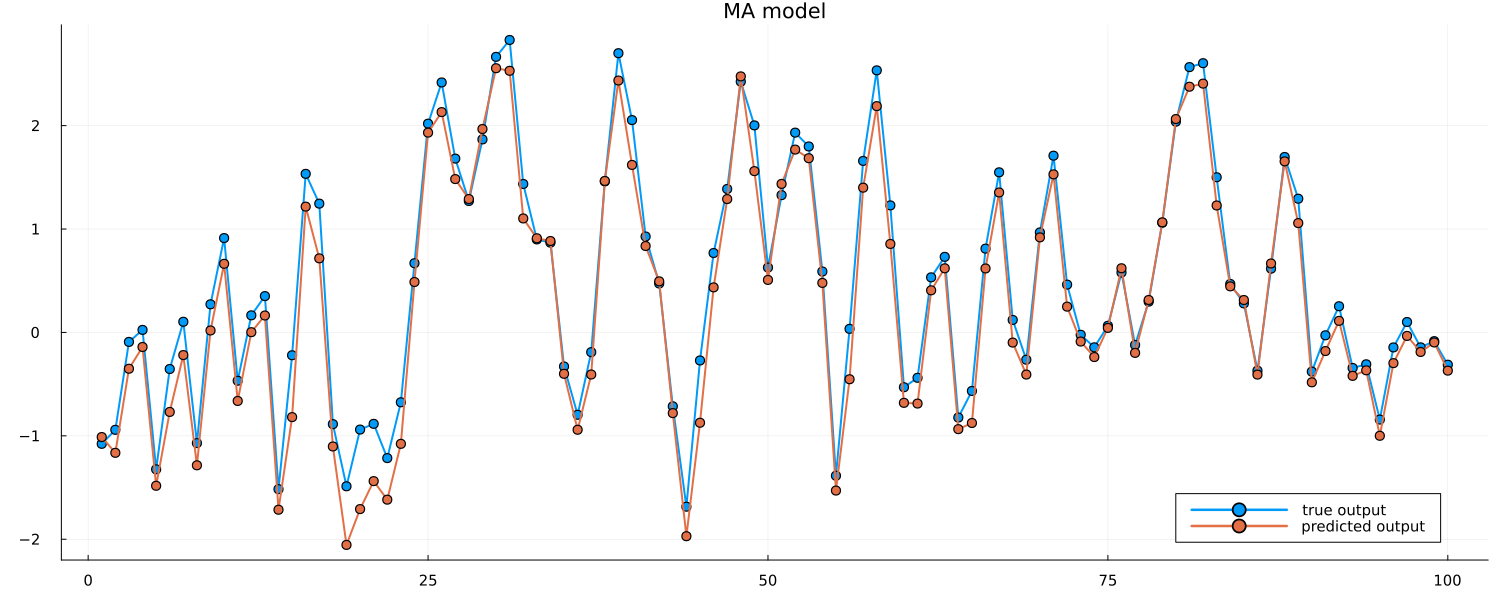

In [25]:
T = length(u)
width = 5
A = zeros(T, width)

for i = 1:width
    A[i:end, i] = u[1:end-i+1]
end

wopt = A \ y
yest = A * wopt

println("The norm of the error using MA is: ", norm(yest - y))

# Criar um gráfico e adicionar curvas com estética ajustada
plot([y yest], label = ["true output" "predicted output"], legend=:bottomright, size=(1500, 600), xlabel="Time", ylabel="Values", linewidth=2, marker=:circle, markersize=5, titlefontsize=14, legendfontsize=10, tickfontsize=10, guidefontsize=12)
xlabel!("Time")
ylabel!("Output")
title!("MA model")

The norm of the error using AR is: 7.436691765656793


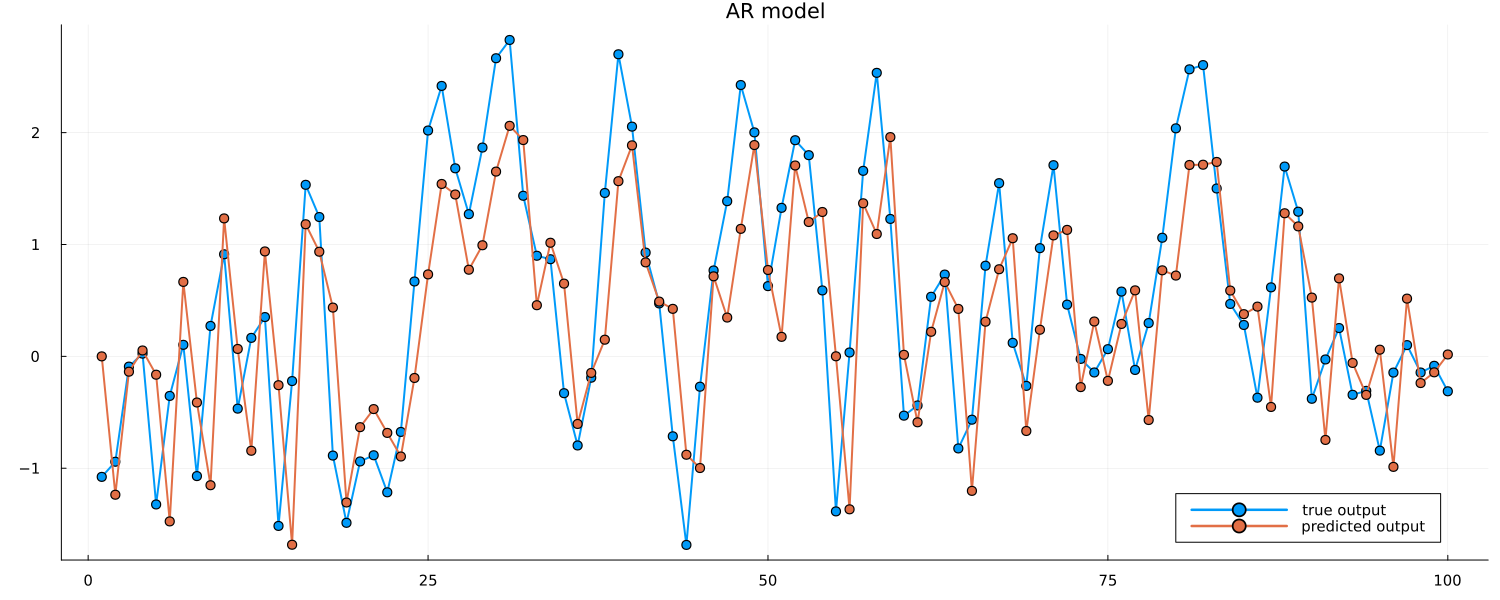

In [26]:
width = 5
A = zeros(T, width)

for i = 1:width
    A[i+1:end, i] = y[1:end-i]
end

wopt = A \ y
yest = A * wopt

println("The norm of the error using AR is: ", norm(yest - y))

plot([y yest], label = ["true output" "predicted output"], legend=:bottomright, size=(1500, 600), xlabel="Time", ylabel="Values", linewidth=2, marker=:circle, markersize=5, titlefontsize=14, legendfontsize=10, tickfontsize=10, guidefontsize=12)
xlabel!("Time")
ylabel!("Output")
title!("AR model")

The norm of the error using ARMA is: 1.8565828148734604


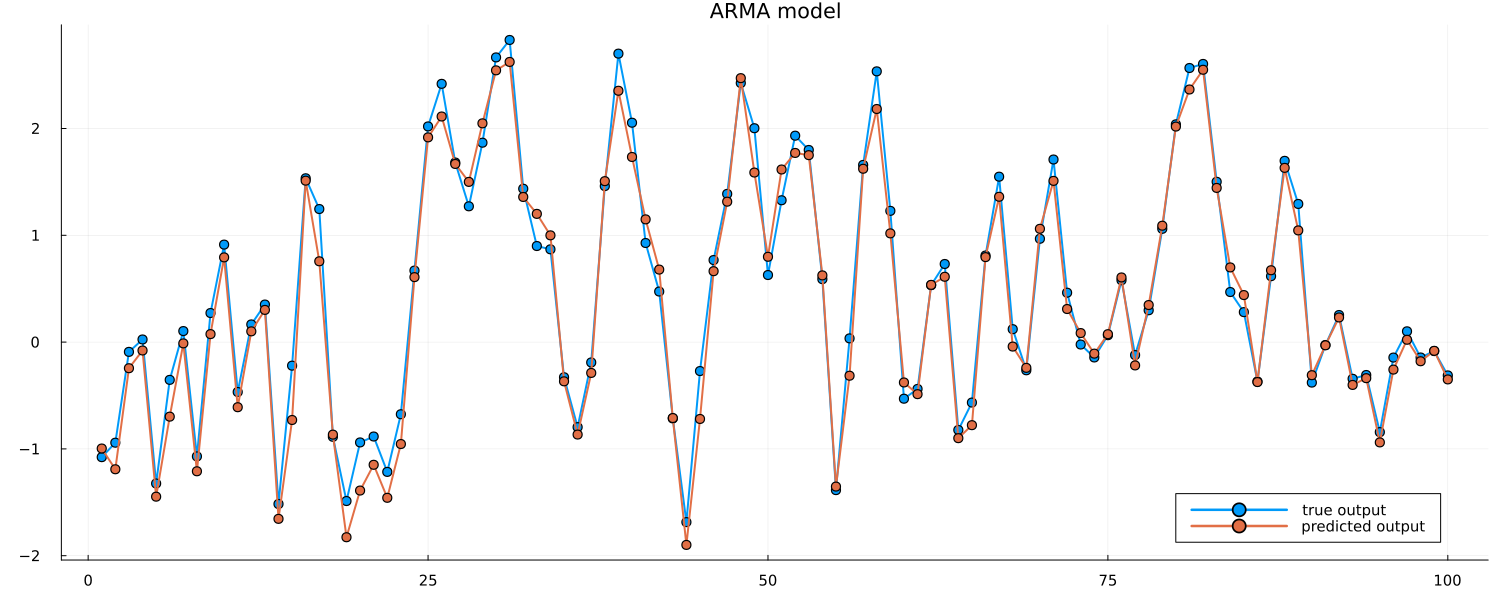

In [28]:
w1 = 1
w2 = 1
A = zeros(T, w1 + w2)

for i = 1:w1
    A[i:end, i] = u[1:end-i+1]
end

for i = 1:w2
    A[i+1:end, w1+i] = y[1:end-i]
end

wopt = A \ y
yest = A * wopt

println("The norm of the error using ARMA is: ", norm(yest - y))

plot([y yest], label = ["true output" "predicted output"], legend=:bottomright, size=(1500, 600), xlabel="Time", ylabel="Values", linewidth=2, marker=:circle, markersize=5, titlefontsize=14, legendfontsize=10, tickfontsize=10, guidefontsize=12)
xlabel!("Time")
ylabel!("Output")
title!("ARMA model")

### Problema 9 (SOCP)
A **mediana geométrica** de um conjunto de pontos $x_i, i = 1,\ldots , k$ em $R^2$ é o ponto $x$ que minimiza a soma das distâncias Euclideanas aos pontos $x_i$, Escreva o problema de encontrar a mediana geométrica de $k$ pontos em $R^2$ como um programa cônico de segunda ordem (SOCP).


In [38]:
using JuMP
using ECOS
using Plots

data_points = [
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 1.0],
    [4.0, 5.0]
]

k = size(data_points, 1)

model = Model(ECOS.Optimizer)

@variable(model, x[1:2])

@variable(model, t[1:k] >= 0)

@objective(model, Min, sum(t))

for i in 1:k
    point_vector = data_points[i]
    @constraint(model, [t[i], x[1] - point_vector[1], x[2] - point_vector[2]] in SecondOrderCone())
end

optimize!(model)

optimal_point = value.(x)
optimal_distance = objective_value(model)

println("Coordenadas da média geométrica: ", optimal_point)
println("Soma ótima das distâncias: ", optimal_distance)

scatter([p[1] for p in data_points], [p[2] for p in data_points],
    label="Pontos", marker=:circle, color=:blue, xlabel="x", ylabel="y", legend=:topleft)
plot!([optimal_point[1]], [optimal_point[2]],
    seriestype=:scatter, label="Média Geométrica", color=:red, markersize=8)

for p in data_points
    plot!([optimal_point[1], p[1]], [optimal_point[2], p[2]],
        label="", color=:gray, linestyle=:dot)
end


Coordenadas da média geométrica: [2.000074467565762, 2.9998510951954174]
Soma ótima das distâncias: 6.478708615283234

ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +9e+00  5e-01  7e-03  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +4.831e-01  +5.431e-01  +4e+00  3e-01  3e-03  5e-01  5e-01  0.6762  1e-01   1  1  1 |  0  0
 2  +4.131e+00  +4.423e+00  +3e+00  3e-01  2e-03  8e-01  3e-01  0.5645  4e-01   2  2  2 |  0  0
 3  +5.176e+00  +5.286e+00  +7e-01  1e-01  7e-04  2e-01  8e-02  0.7488  2e-02   2  1  1 |  0  0
 4  +6.088e+00  +6.126e+00  +2e-01  3e-02  2e-04  7e-02  2e-02  0.9797  2e-01   2  2  2 |  0  0
 5  +6.389e+00  +6.397e+00  +3e-02  5e-03  3e-05  1e-02  3e-03  0.9389  1e-01   2  1  1 |  0  0
 6  +6.460e+00  +6.461e+00  +5e-03  1e-03  6e-06  3e-03  7e-04  0.8326  5e-02   2  2  2 |  0  0
 7  +6.470e+00  +6.471e+

### Problema 10 (NLLS: mínimos quadrados nãolineares)

A series of experiments is conducted to determine the effect of a particular fertilizer on wheat crop yield. Here are the results:

|fertilizer rate ($x$) |	crop yield ($y$) |
|----------------------|---------------------|
|-5 |	127 |
|-3 |	151 |
|-1 |	379
|1 	| 421 |
|3 |	460 |
|5 |	426 |

Such situations typically involve some sort of diminishing returns. So there is a limit to how much the fertilizer can boost the yield. A popular model for this relationship is the following:
$$y=k_1+ k_2 \exp(k_3 x)$$

Use nonlinear least squares to determine the values of $(k_1,k_2,k_3)$
that provide the best fit to the data. We are expecting coefficients in the neighborhood of $(500,-200,-1)$. To display your result, produce a plot of the original data points and the best-fit curve.

Parâmetros Ajustados:
p1 = 523.3055369153885
p2 = -156.94784149313074
p3 = -0.19966457098386536


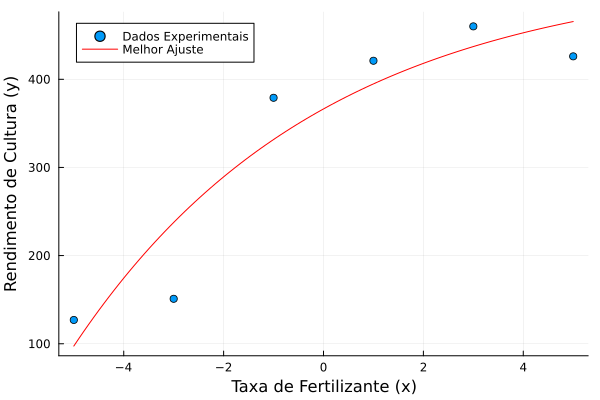

In [37]:
using LsqFit
using Plots

x_vals = [-5.0, -3.0, -1.0, 1.0, 3.0, 5.0]
y_vals = [127.0, 151.0, 379.0, 421.0, 460.0, 426.0]

fit_model(x, p) = p[1] .+ p[2] .* exp.(p[3] .* x)

params_init = [500.0, -200.0, -1.0]

fit_result = curve_fit(fit_model, x_vals, y_vals, params_init)

opt_params = coef(fit_result)

x_range = range(-5, stop = 5, length = 100)
y_range = fit_model(x_range, opt_params)

println("Parâmetros Ajustados:")
println("p1 = ", opt_params[1])
println("p2 = ", opt_params[2])
println("p3 = ", opt_params[3])

scatter(x_vals, y_vals, label="Dados Experimentais", legend=:topleft)
plot!(x_range, y_range, label="Melhor Ajuste", color="red")
xlabel!("Taxa de Fertilizante (x)")
ylabel!("Rendimento de Cultura (y)")


##   Exercícios dos slides

![image.png](attachment:image.png)

S1. Demonstre as afirmações para $p=1,2,\infty$ acima.

![image.png](attachment:image.png)
S2. Demonstre isso para matrizes de rotação $2 \times 2$ e $3 \times 3$.

 S3. V ou F. Se V, justifique, Se F, corrija!
 - Toda matriz possui $n$ autovalores reais.
 - Toda matriz possui $n$ autovetores linearmente independentes
 - Toda matriz possui um conjunto de autovetores ortogonais entre si.
 - Toda matriz simétrica pode ser escrita como uma diferença de matrizes positivas semi-definidas.

**A) Falsa.** Para que uma matriz tenha todos os autovalores reais, ela deve ser simétrica. Matrizes não simétricas podem ter autovalores que são complexos.

**B) Falsa.** Para que uma matriz tenha um conjunto de autovetores linearmente independentes, é necessário que ela seja simétrica. Se a matriz tiver autovalores repetidos e não tiver uma base completa de autovetores, não será possível obter autovetores linearmente independentes.

**C) Falsa.** A condição para que uma matriz tenha autovetores ortogonais entre si é que ela seja simétrica.

**D) Verdadeira.** Ao fazer a decomposição espectral de uma matriz simétrica, é possível separar os autovalores em dois grupos, positivos e negativos, e associá-los a duas matrizes semidefinidas positivas (PSD), que, quando somadas, recriam a matriz original.

S4. Escreva código em Julia para reproduzir o gráfico no slide 12-8
![image.png](attachment:image.png)

S5. Escreva código em Julia para reproduzir a figura no slide 12-10
![image.png](attachment:image.png)

S6. Dê exemplos de $P,q,r$ ilustrando os casos de QPs mostrados nos slides 12-12, 12-13.

S7. Verifique as afrimações no slide 12-25
![image.png](attachment:image.png)

- S8. Escreva $|x| < y$ como restrição cônica de segunda ordem (restrição SOC).
- S9. Mostre como escrever QPs e QCQPs como SOCPs.
- S10. Escreva código em Julia para reproduzir as figuras nos slides 13-17 (incerteza = bola em norma infinita), e 13-20 (incerteza = bola em norma-2).
- S11. Verifique que as duas formas de escrever um SDP (no slide 13-26) são equivalentes.
- S12. Verifique as afirmações nos slides 13-27 e 13-28.